In [68]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skp
import sklearn.linear_model as sklm
from scipy import stats as st
import matplotlib.pyplot as plt

Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'

cardata = pd.read_csv(Data)

cardata.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [69]:
reducedcardata = cardata[(cardata['Identification.Make'] == 'Honda') & (cardata['Fuel Information.Fuel Type'] == 'Gasoline')]

reducedcardata.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
101,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,6,6 Speed Manual,17,Gasoline,25,Manual transmission,2010 Honda Accord EX-L V-6 Coup,Honda,2010 Honda Accord Coupe,2010,271,251
102,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
103,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Manual,22,Gasoline,31,Manual transmission,2010 Honda Accord EX-L Coup,Honda,2010 Honda Accord Coupe,2010,190,162
104,152,240,57,Front-wheel drive,Honda 2.4L 4 cylinder 190 hp 162 ft-lbs,True,5,5 Speed Automatic,21,Gasoline,31,Automatic transmission,2010 Honda Accord EX-L Coup AT,Honda,2010 Honda Accord Coupe,2010,190,162
105,152,240,57,Front-wheel drive,Honda 3.5L 6 Cylinder 271hp 251 ft-lbs,True,5,5 Speed Automatic,19,Gasoline,28,Automatic transmission,2010 Honda Accord EX-L V-6 Coup AT,Honda,2010 Honda Accord Coupe,2010,271,251


In [70]:
furtherreducedcardata = reducedcardata[['Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower']]

threshhold = .9

z_scores = np.abs(st.zscore(furtherreducedcardata))
furtherreducedcardata_without_outliers = furtherreducedcardata[(z_scores < threshhold).all(axis=1)]

print(furtherreducedcardata_without_outliers.shape)
print(furtherreducedcardata.shape)

furtherreducedcardata.head()

(58, 2)
(198, 2)


,Fuel Information.Highway mpg,Engine Information.Engine Statistics.Horsepower
101,25,271
102,31,190
103,31,190
104,31,190
105,28,271


[[0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16608201 0.98611194]
 [0.17112233 0.98524979]
 [0.16608201 0.98611194]
 [0.17112233 0.98524979]
 [0.17112233 0.98524979]
 [0.17251532 0.98500683]
 [0.17251532 0.98500683]
 [0.17251532 0.98500683]
 [0.17251532 0.98500683]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.16102864 0.98694973]
 [0.18328243 0.9830603 ]
 [0.1886416  0.982046  ]
 [0.1886416  0.982046  ]
 [0.1886416  0.982046  ]
 [0.17112233 0.98524979]
 [0.17614925 0.98436347]
 [0.17614925 0.98436347]
 [0.14563857 0.98933786]
 [0.14563857 0.98933786]
 [0.14563857 0.98933786]
 [0.14563857 0.98933786]
 [0.15370701 0.98811647]
 [0.14834045 0.98893635]
 [0.15370701 0.98811647]
 [0.14834045 0.98893635]
 [0.15370701 0.98811647]
 [0.14834045 0.98893635]
 [0.15370701 0.98811647]
 [0.14834045 0.98893635]
 [0.15370701 0.98811647]
 [0.14834045 0.98893635]


TypeError: float() argument must be a string or a real number, not 'LinearRegression'

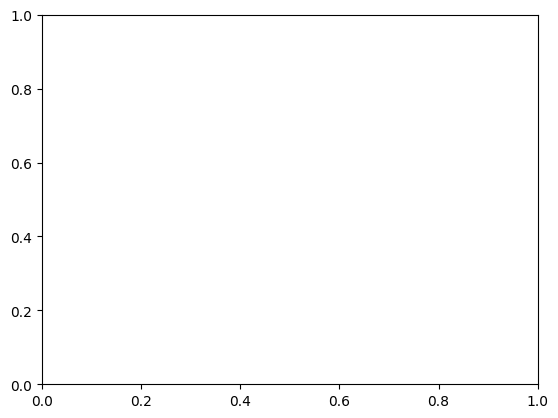

In [71]:
normalizedcardata = skp.normalize(furtherreducedcardata_without_outliers)

print(normalizedcardata)

regresseddata = sklm.LinearRegression().fit(furtherreducedcardata_without_outliers["Engine Information.Engine Statistics.Horsepower", "Fuel Information.Highway mpg"])